In [1]:
import os
import axelrod as axl
import pandas as pd
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

first_tournament_participants_ordered_by_reported_rank = [s() for s in axl.axelrod_first_strategies]
number_of_strategies = len(first_tournament_participants_ordered_by_reported_rank)

In [2]:
tournament1 = axl.Tournament(
     players=first_tournament_participants_ordered_by_reported_rank,
     turns=200,
     repetitions=5,
     seed=124,
)
tournament2 = axl.Tournament(
     players=first_tournament_participants_ordered_by_reported_rank,
     turns=200,
     repetitions=5,
     seed=1300,
)
results1 = tournament1.play()
results2 = tournament2.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 215.22it/s]


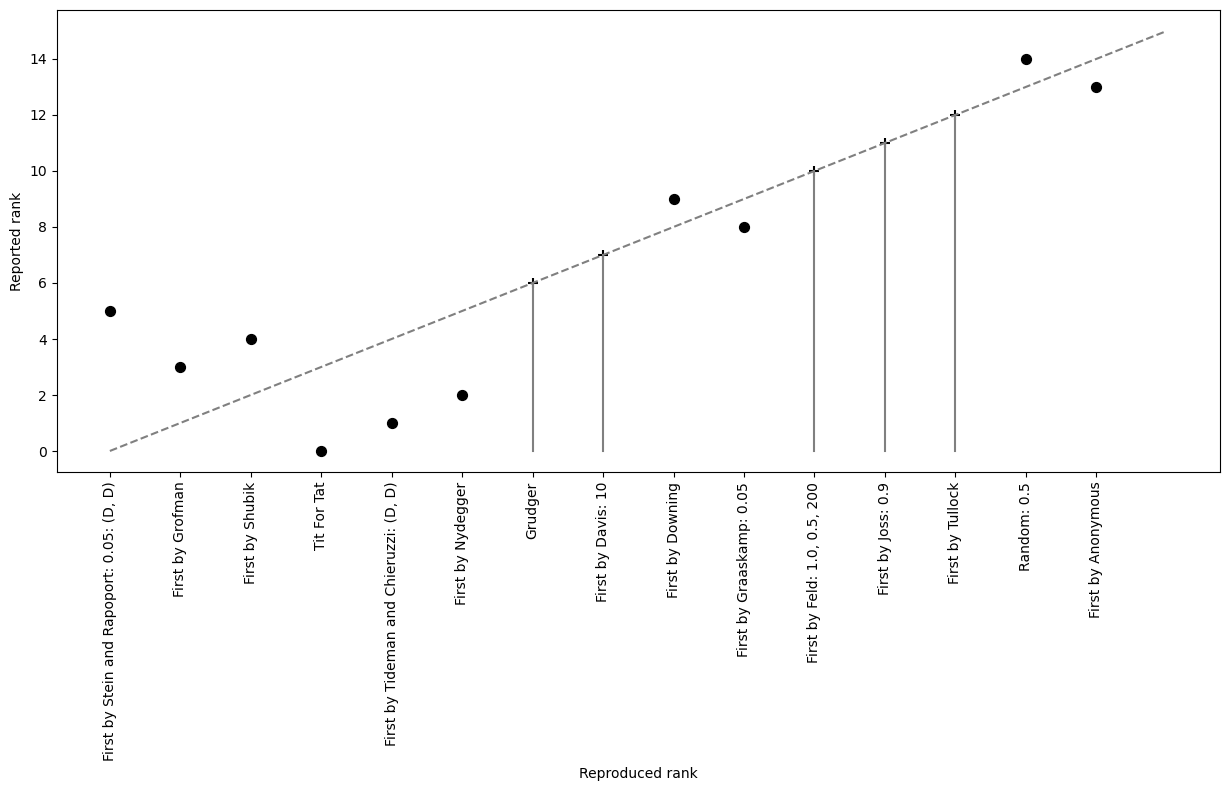

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot((0, 15), (0, 15), color="grey", linestyle="--")
for original_rank, strategy in enumerate(first_tournament_participants_ordered_by_reported_rank):
    rank = results1.ranked_names.index(str(strategy))
    if rank == original_rank:
        symbol = "+"
        plt.plot((rank, rank), (rank, 0), color="grey")
    else:
        symbol = "o"
    plt.scatter([rank], [original_rank], marker=symbol, color="black", s=50)
plt.xticks(
    range(number_of_strategies),
    results1.ranked_names,
    rotation=90
)
plt.ylabel("Reported rank")
plt.xlabel("Reproduced rank");
plt.show()

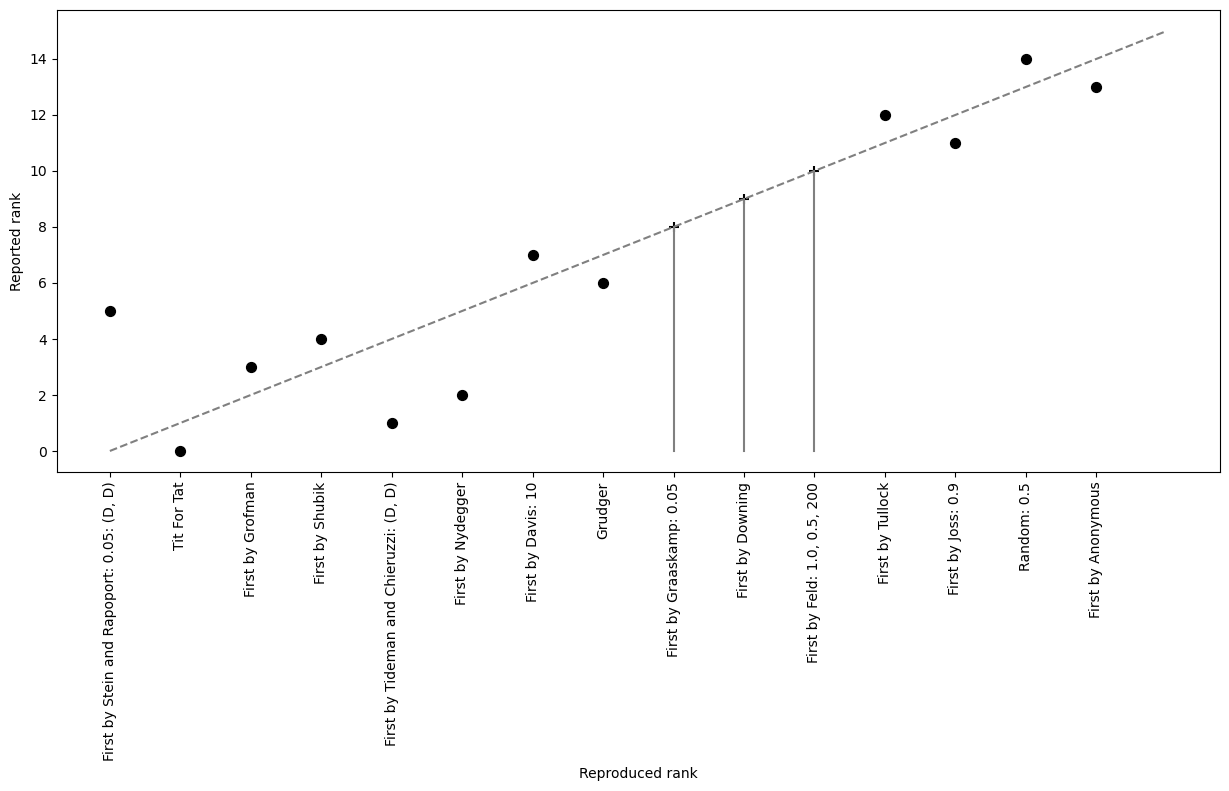

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot((0, 15), (0, 15), color="grey", linestyle="--")
for original_rank, strategy in enumerate(first_tournament_participants_ordered_by_reported_rank):
    rank = results2.ranked_names.index(str(strategy))
    if rank == original_rank:
        symbol = "+"
        plt.plot((rank, rank), (rank, 0), color="grey")
    else:
        symbol = "o"
    plt.scatter([rank], [original_rank], marker=symbol, color="black", s=50)
plt.xticks(
    range(number_of_strategies),
    results2.ranked_names,
    rotation=90
)
plt.ylabel("Reported rank")
plt.xlabel("Reproduced rank");
plt.show()

C:\Users\leonc\AppData\Local\Temp\ipykernel_20044\837742850.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


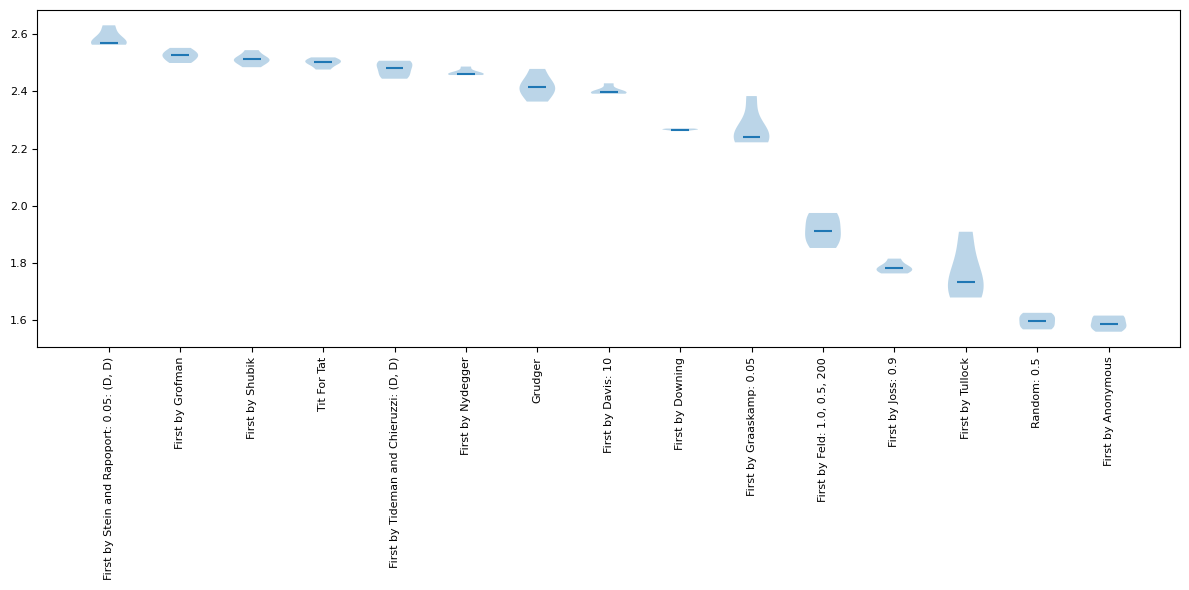

In [5]:
plot = axl.Plot(results1)
p = plot.boxplot()
p.show()

C:\Users\leonc\AppData\Local\Temp\ipykernel_20044\2162084034.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


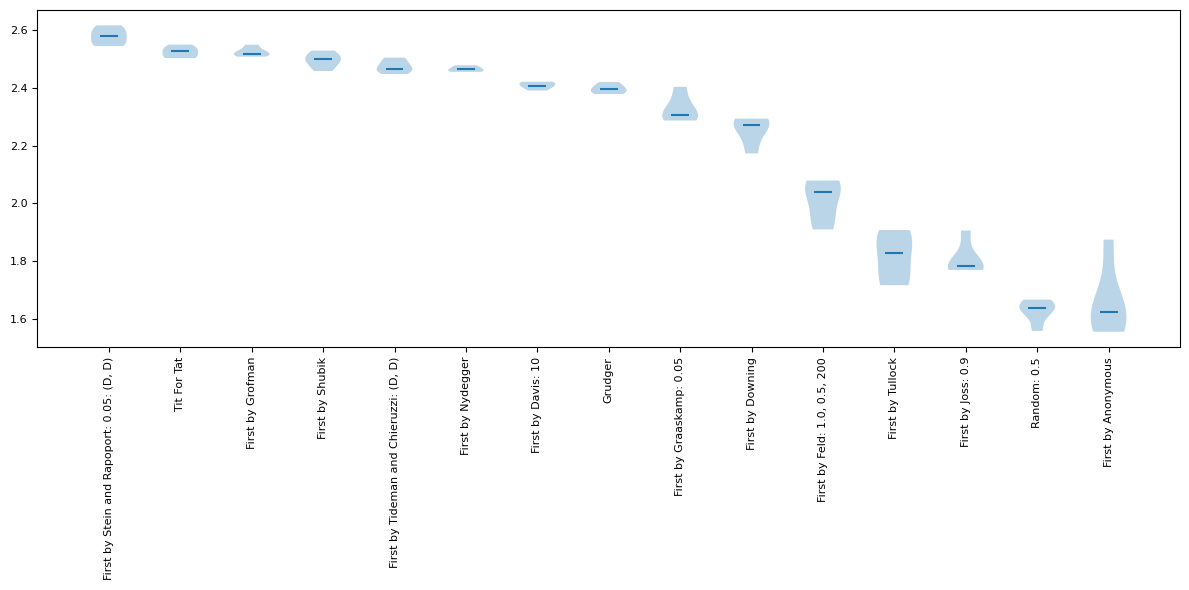

In [6]:
plot = axl.Plot(results2)
p = plot.boxplot()
p.show()

In [7]:
summary = results1.summarise()
df1 = pd.DataFrame(summary)

Correlation between Median Score and Cooperation Rating: 0.6303


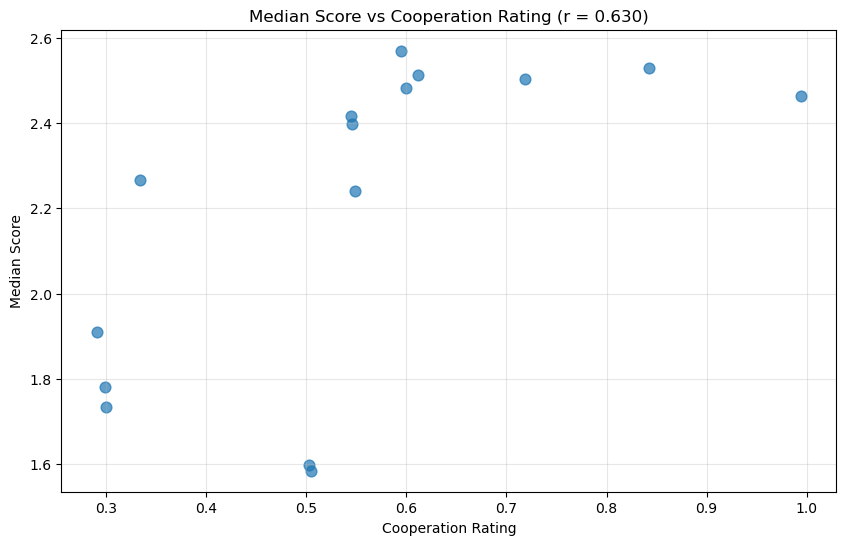

In [ ]:
correlation = df1["Median_score"].corr(df1["Cooperation_rating"])
print(f"Correlation between Median Score and Cooperation Rating: {correlation:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(df1["Cooperation_rating"], df1["Median_score"], alpha=0.7, s=60)
plt.xlabel("Cooperation Rating")
plt.ylabel("Median Score")
plt.title(f"Median Score vs Cooperation Rating (r = {correlation:.3f})")
plt.grid(True, alpha=0.3)
plt.show()